## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read CSV

In [2]:
data = pd.read_csv("bekasi-house-preprocessed.csv")
data.head()

,bedroom,bathroom,land_area,building_area,certificate,electric_power,floor_num,prop_cond,furniture_cond,facing,price
0,4.0,3.0,77,112,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Semi Furnished,East,1.350
1,3.0,3.0,73,93,SHM - Sertifikat Hak Milik,2200.0,2.0,New,Unfurnished,East,0.995
2,2.0,2.0,105,90,SHM - Sertifikat Hak Milik,2200.0,2.0,Renovated,Unfurnished,South,1.020
3,4.0,3.0,210,150,SHM - Sertifikat Hak Milik,2200.0,1.0,Good,Unfurnished,East,1.500
4,2.0,2.0,60,50,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Unfurnished,North,1.100


In [3]:
data.shape

(823, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedroom         823 non-null    float64
 1   bathroom        823 non-null    float64
 2   land_area       823 non-null    int64  
 3   building_area   823 non-null    int64  
 4   certificate     823 non-null    object 
 5   electric_power  823 non-null    float64
 6   floor_num       823 non-null    float64
 7   prop_cond       823 non-null    object 
 8   furniture_cond  823 non-null    object 
 9   facing          823 non-null    object 
 10  price           823 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 70.9+ KB


There are no missing values in data. Therefore, this data is already cleaned.
<br><br>
However, we need to do **another preprocessing** to be able to do model building.

<AxesSubplot:>

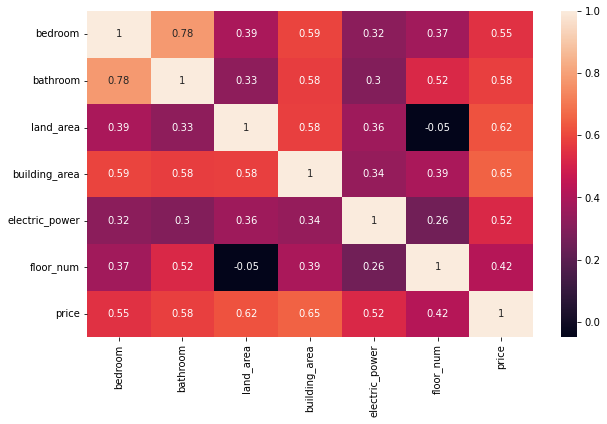

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True)

It seems that **"land-to-build ratio"** and **"bedroom-to-bathroom ratio"** can be considered to be significant features for **house price** prediction.

In [6]:
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing (1)

In [7]:
# Land to build ratio
data["land_build_ratio"] = data["land_area"] / data["building_area"]

# Bedroom to bathroom ratio
data["bed_bath_ratio"] = data["bedroom"] / data["bathroom"]

In [8]:
data.head()

,bedroom,bathroom,land_area,building_area,certificate,electric_power,floor_num,prop_cond,furniture_cond,facing,price,land_build_ratio,bed_bath_ratio
0,4.0,3.0,77,112,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Semi Furnished,East,1.350,0.687500,1.333333
1,3.0,3.0,73,93,SHM - Sertifikat Hak Milik,2200.0,2.0,New,Unfurnished,East,0.995,0.784946,1.000000
2,2.0,2.0,105,90,SHM - Sertifikat Hak Milik,2200.0,2.0,Renovated,Unfurnished,South,1.020,1.166667,1.000000
3,4.0,3.0,210,150,SHM - Sertifikat Hak Milik,2200.0,1.0,Good,Unfurnished,East,1.500,1.400000,1.333333
4,2.0,2.0,60,50,SHM - Sertifikat Hak Milik,2200.0,2.0,Good,Unfurnished,North,1.100,1.200000,1.000000


<AxesSubplot:>

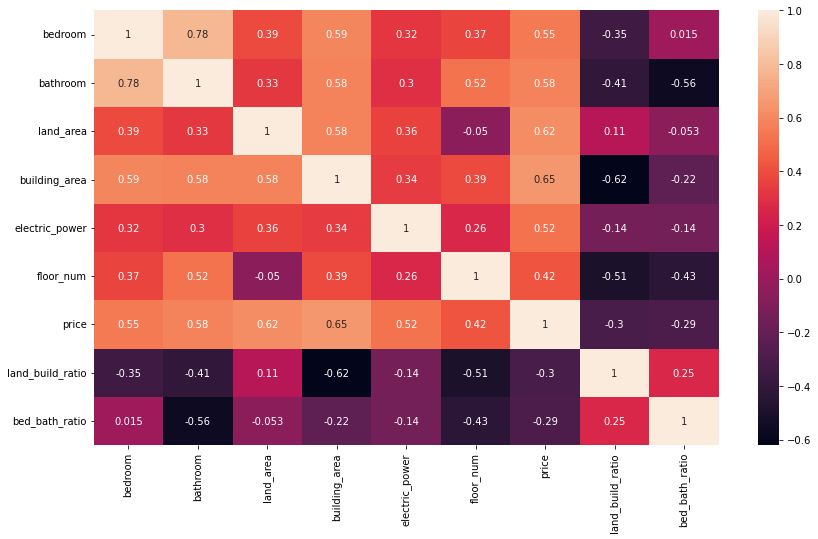

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True)

Based on the correlation plot, **land_build_ratio** and **bed_bath_ratio** are not good enough to predict the house price. Also, **facing** columns is not suited to be one of features to predict the price.

In [10]:
data.drop(["land_build_ratio", "bed_bath_ratio", "facing"], axis=1, inplace=True)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

# Define features
X = data.drop("price", axis=1)
Y = data["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,bedroom,bathroom,land_area,building_area,certificate,electric_power,floor_num,prop_cond,furniture_cond
239,3.0,2.0,100,83,SHM - Sertifikat Hak Milik,2200.0,2.0,Renovated,Unfurnished
707,3.0,3.0,61,90,SHM - Sertifikat Hak Milik,2200.0,2.0,New,Unfurnished
759,2.0,1.0,90,85,SHM - Sertifikat Hak Milik,1300.0,1.0,Good,Unfurnished
432,2.0,1.0,80,55,SHM - Sertifikat Hak Milik,2200.0,1.0,Good,Unfurnished
299,3.0,3.0,71,100,SHM - Sertifikat Hak Milik,2200.0,1.0,New,Unfurnished


## Check Statistical Assumptions

### Preparation

In [13]:
# Define numerical columns
num_cols = X_train.dtypes[X_train.dtypes != "O"].index
num_cols

Index(['bedroom', 'bathroom', 'land_area', 'building_area', 'electric_power',
       'floor_num'],
      dtype='object')

In [14]:
# Encode prop_cond and furniture_cond to be label encoded
def prop_label(row):
    if row == "New":
        return 0
    elif row == "Good":
        return 1
    elif row == "Renovated":
        return 2
    elif row == "Needs Renovation":
        return 3
    
def furn_label(row):
    if row == "Unfurnished":
        return 0
    elif row == "Semi Furnished":
        return 1
    elif row == "Furnished":
        return 2
    
X_train["prop_cond"] = X_train["prop_cond"].apply(prop_label)
X_train["furniture_cond"] = X_train["furniture_cond"].apply(furn_label)
X_train.shape

(658, 9)

In [15]:
# Encode certificate to be one hot encoded
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop="first")
enc_data = pd.DataFrame(enc.fit_transform(X_train[['certificate']]).toarray())
enc_data.columns = enc.get_feature_names(["certificate"])

enc_data.index = X_train.index
X_train = pd.concat([X_train, enc_data], axis=1).drop("certificate", axis=1)

In [16]:
X_train.head()

,bedroom,bathroom,land_area,building_area,electric_power,floor_num,prop_cond,furniture_cond,"certificate_Lainnya (PPJB,Girik,Adat,dll)",certificate_SHM - Sertifikat Hak Milik
239,3.0,2.0,100,83,2200.0,2.0,2,0,0.0,1.0
707,3.0,3.0,61,90,2200.0,2.0,0,0,0.0,1.0
759,2.0,1.0,90,85,1300.0,1.0,1,0,0.0,1.0
432,2.0,1.0,80,55,2200.0,1.0,1,0,0.0,1.0
299,3.0,3.0,71,100,2200.0,1.0,0,0,0.0,1.0


### Checking

In [17]:
# Check linear regression assumption, but first let's make the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predict on X_train
y_pred = lr.predict(X_train)

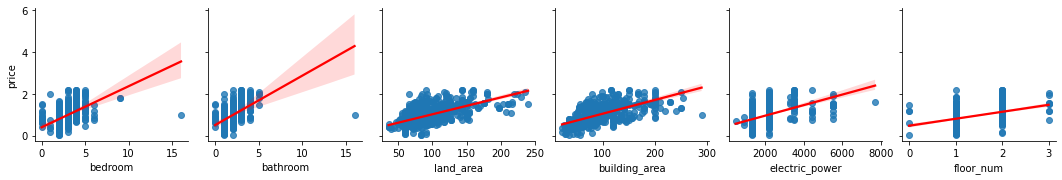

In [18]:
# Linearity
combined_xy = pd.concat([X_train, Y_train], axis=1)

sns.pairplot(data=combined_xy,
             y_vars=['price'],
             x_vars=num_cols,
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}}
            )
plt.show()

Price is linearly correlated to all features.

In [19]:
# Autocorrelation
from statsmodels.stats.stattools import durbin_watson

residuals = (Y_train - y_pred) ** 2
dw_value = durbin_watson(residuals)

print(f"Durbin-Watson: {dw_value}")
if dw_value < 1 or dw_value > 3:
    print("Alarm !!")
else:
    print("Assumed to be No Autocorrelation")

Durbin-Watson: 1.5997301370672112
Assumed to be No Autocorrelation


In [20]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data

,feature,VIF
0,bedroom,17.846029
1,bathroom,12.573711
2,land_area,13.452915
3,building_area,10.707603
4,electric_power,7.537387
5,floor_num,10.411930
6,prop_cond,2.753072
7,furniture_cond,1.230622
8,"certificate_Lainnya (PPJB,Girik,Adat,dll)",1.183590
9,certificate_SHM - Sertifikat Hak Milik,8.508741


We face a **multicollinearity problem** since there is high value of VIF in one of features.

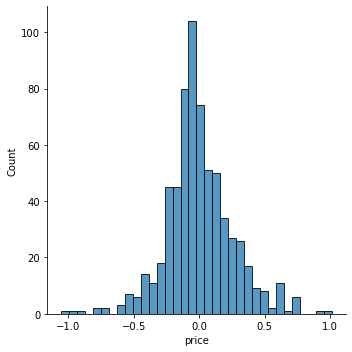

In [21]:
# Normality of Errors
residuals = (Y_train - y_pred)
sns.displot(residuals)

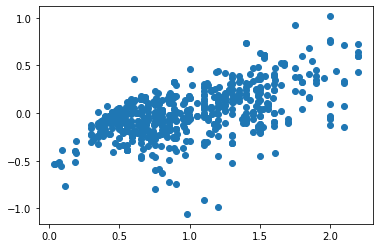

In [22]:
# Homoscedasticity
residuals = Y_train - y_pred
plt.scatter(x=Y_train, y=residuals)
plt.show()

Based on the scatter plot, our model faces **heteroscedasticity problem**.

## Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train.iloc[:,:-3])
scaled_X_train

array([[ 0.10451105,  0.05803751,  0.19901098, ...,  0.19738383,
         0.98216383,  1.93910411],
       [ 0.10451105,  0.98946879, -0.89223258, ...,  0.19738383,
         0.98216383, -1.09160968],
       [-0.72402232, -0.87339377, -0.08079506, ..., -0.78447843,
        -0.86959491,  0.42374722],
       ...,
       [-0.72402232,  0.05803751, -0.78031016, ...,  0.19738383,
         0.98216383, -1.09160968],
       [-0.72402232,  0.05803751, -0.80829077, ..., -0.78447843,
         0.98216383, -1.09160968],
       [ 0.93304441,  0.05803751,  3.27687745, ...,  0.19738383,
        -0.86959491,  0.42374722]])

In [24]:
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=X_train.columns[:-3])
scaled_X_train_df.head()

,bedroom,bathroom,land_area,building_area,electric_power,floor_num,prop_cond
0,0.104511,0.058038,0.199011,-0.086358,0.197384,0.982164,1.939104
1,0.104511,0.989469,-0.892233,0.067516,0.197384,0.982164,-1.091610
2,-0.724022,-0.873394,-0.080795,-0.042394,-0.784478,-0.869595,0.423747
3,-0.724022,-0.873394,-0.360601,-0.701857,0.197384,-0.869595,0.423747
4,0.104511,0.989469,-0.612427,0.287338,0.197384,-0.869595,-1.091610


In [25]:
scaled_X_train_df = pd.concat([scaled_X_train_df, X_train.iloc[:, -3:].reset_index(drop=True)], axis=1)
scaled_X_train_df.head()

,bedroom,bathroom,land_area,building_area,electric_power,floor_num,prop_cond,furniture_cond,"certificate_Lainnya (PPJB,Girik,Adat,dll)",certificate_SHM - Sertifikat Hak Milik
0,0.104511,0.058038,0.199011,-0.086358,0.197384,0.982164,1.939104,0,0.0,1.0
1,0.104511,0.989469,-0.892233,0.067516,0.197384,0.982164,-1.091610,0,0.0,1.0
2,-0.724022,-0.873394,-0.080795,-0.042394,-0.784478,-0.869595,0.423747,0,0.0,1.0
3,-0.724022,-0.873394,-0.360601,-0.701857,0.197384,-0.869595,0.423747,0,0.0,1.0
4,0.104511,0.989469,-0.612427,0.287338,0.197384,-0.869595,-1.091610,0,0.0,1.0


### Checking

In [26]:
# Check linear regression assumption, but first let's make the model
from sklearn.linear_model import LinearRegression

new_lr = LinearRegression()
new_lr.fit(scaled_X_train_df, Y_train)

# Predict on X_train
y_pred = new_lr.predict(scaled_X_train_df)

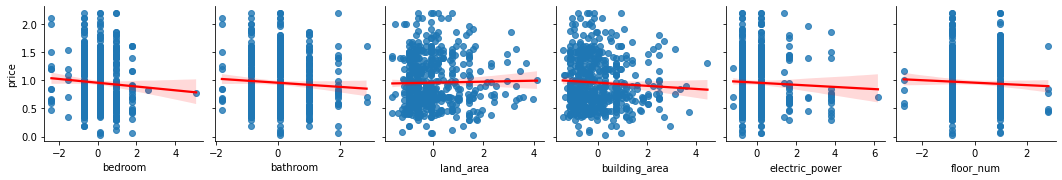

In [27]:
# Linearity
combined_xy = pd.concat([scaled_X_train_df, Y_train], axis=1)

sns.pairplot(data=combined_xy,
             y_vars=['price'],
             x_vars=num_cols,
             kind="reg",
             plot_kws={'line_kws':{'color':'red'}}
            )
plt.show()

<AxesSubplot:>

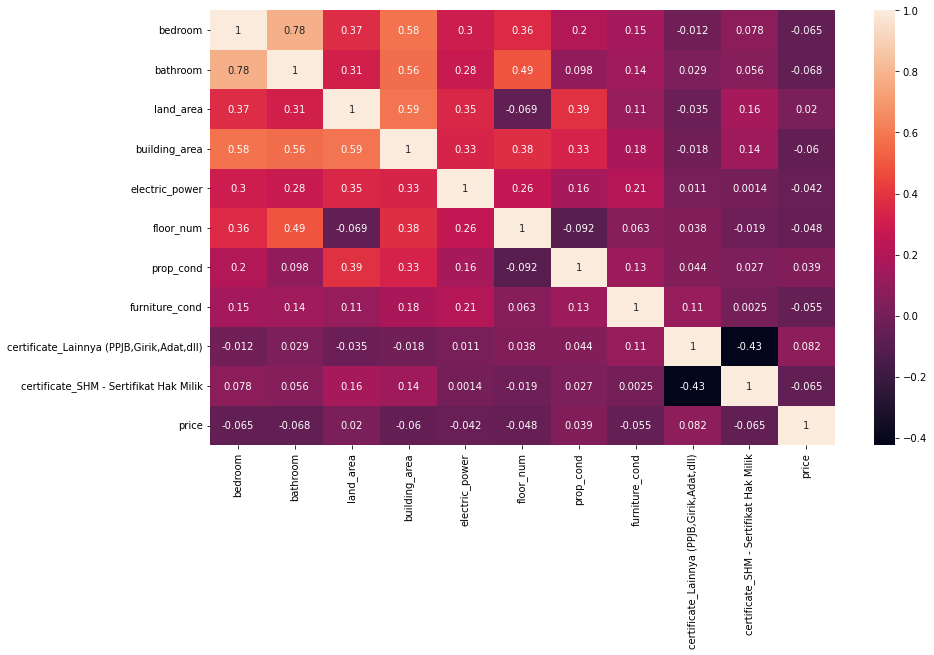

In [28]:
plt.figure(figsize=(14, 8))
sns.heatmap(combined_xy.corr(), annot=True)

Price is linearly correlated to all features.

In [29]:
# Autocorrelation
from statsmodels.stats.stattools import durbin_watson

residuals = (Y_train - y_pred) ** 2
dw_value = durbin_watson(residuals)

print(f"Durbin-Watson: {dw_value}")
if dw_value < 1 or dw_value > 3:
    print("Alarm !!")
else:
    print("Assumed to be No Autocorrelation")

Durbin-Watson: 1.5997301370671881
Assumed to be No Autocorrelation


In [30]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = scaled_X_train_df.columns
vif_data['VIF'] = [variance_inflation_factor(scaled_X_train_df.values, i) for i in range(len(scaled_X_train_df.columns))]

vif_data

,feature,VIF
0,bedroom,2.834523
1,bathroom,3.070881
2,land_area,2.041097
3,building_area,2.483027
4,electric_power,1.304188
5,floor_num,1.738471
6,prop_cond,1.265270
7,furniture_cond,1.228788
8,"certificate_Lainnya (PPJB,Girik,Adat,dll)",1.038754
9,certificate_SHM - Sertifikat Hak Milik,1.132187


We face a **multicollinearity problem** since there is high value of VIF in one of features.

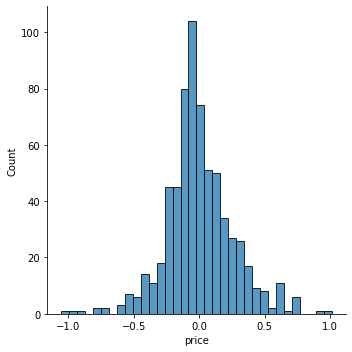

In [31]:
# Normality of Errors
residuals = (Y_train - y_pred)
sns.displot(residuals)

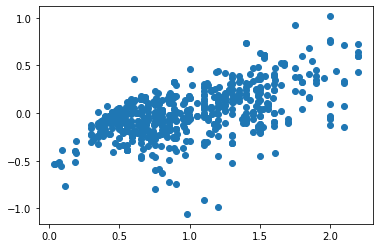

In [32]:
# Homoscedasticity
residuals = Y_train - y_pred
plt.scatter(x=Y_train, y=residuals)
plt.show()

## Brief Evaluation

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_pred = lr.predict(X_train)
new_lr_pred = new_lr.predict(scaled_X_train_df)

# Evaluate "lr" model
lr_mse = mean_squared_error(Y_train, lr_pred)
lr_mae = mean_absolute_error(Y_train, lr_pred)

# Evaluate "new_lr" model
new_lr_mse = mean_squared_error(Y_train, new_lr_pred)
new_lr_mae = mean_absolute_error(Y_train, new_lr_pred)

print("Linear Regression")
print(f"Mean squared error: {lr_mse}")
print(f"Mean absolute error: {lr_mae}\n")

print("Linear Regression (With Standardization)")
print(f"Mean squared error: {new_lr_mse}")
print(f"Mean absolute error: {new_lr_mae}\n")

Linear Regression
Mean squared error: 0.06529132313996286
Mean absolute error: 0.1875097336891218

Linear Regression (With Standardization)
Mean squared error: 0.06529132313996286
Mean absolute error: 0.18750973368912258



Because this comparison, I think we cannot use multiple linear regression to predict these house prices. Also, there are any statistical assumptions that this linear regression model satisfy in both standardized and unstandardized data.

In [34]:
# Feature Importance (using normalized data)
feat_importance = pd.DataFrame()
feat_importance['feature'] = X_train.columns
feat_importance['importance'] = new_lr.coef_

feat_importance

,feature,importance
0,bedroom,0.004430
1,bathroom,0.070171
2,land_area,0.204121
3,building_area,0.068911
4,electric_power,0.084137
5,floor_num,0.110365
6,prop_cond,0.013341
7,furniture_cond,0.007658
8,"certificate_Lainnya (PPJB,Girik,Adat,dll)",0.136212
9,certificate_SHM - Sertifikat Hak Milik,-0.130993


## Model Building

In [35]:
# Choose the best machine learning algorithm for this data
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [("Support Vector Machine", SVR()), 
          ("KNN", KNeighborsRegressor()), 
          ("Decision Tree", DecisionTreeRegressor()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor())
         ]

In [36]:
# Using unstandardized data
from sklearn.model_selection import KFold, cross_val_score

fold_5 = KFold(5, shuffle=True)
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X_train, Y_train, scoring="r2", cv=fold_5).mean()
    scores.append(score)
    names.append(name)
    
score_df = pd.DataFrame()
score_df['name'] = names
score_df['r_squared'] = scores

score_df

,name,r_squared
0,Support Vector Machine,0.538866
1,KNN,0.605966
2,Decision Tree,0.521189
3,Random Forest,0.735750
4,XGBoost,0.725431


In [37]:
# Using standardized data
from sklearn.model_selection import KFold, cross_val_score

fold_5 = KFold(5, shuffle=True)
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, scaled_X_train_df, Y_train, scoring="r2", cv=fold_5).mean()
    scores.append(score)
    names.append(name)
    
score_df = pd.DataFrame()
score_df['name'] = names
score_df['r_squared'] = scores

score_df

,name,r_squared
0,Support Vector Machine,0.714518
1,KNN,0.711013
2,Decision Tree,0.559878
3,Random Forest,0.749083
4,XGBoost,0.723539


In this case, we will use **Random Forest Regressor** algorithm. Then, we want to optimize our model by **hyperparameter tuning**.

In [38]:
# From now on, we will use unstandardized data, since Random Forest algorithm performance does not differ
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators": (100, 200, 500, 1000),
    "criterion": ("squared_error", "friedman_mse"),
    "max_features": (None, "sqrt", "log2")
}
rf = RandomForestRegressor(random_state=42)
clf = GridSearchCV(rf, param_grid=parameters, scoring="r2", cv=fold_5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'max_features': (None, 'sqrt', 'log2'),
                         'n_estimators': (100, 200, 500, 1000)},
             scoring='r2')

In [39]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df.sort_values(by="rank_test_score", ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.907237,0.013740,0.063841,0.001013,squared_error,log2,1000,"{'criterion': 'squared_error', 'max_features':...",0.791767,0.708429,0.749181,0.712031,0.774185,0.747118,0.033040,1
7,0.903710,0.015385,0.063046,0.000549,squared_error,sqrt,1000,"{'criterion': 'squared_error', 'max_features':...",0.791767,0.708429,0.749181,0.712031,0.774185,0.747118,0.033040,1
19,0.877099,0.005490,0.062435,0.000596,friedman_mse,sqrt,1000,"{'criterion': 'friedman_mse', 'max_features': ...",0.791745,0.708429,0.749056,0.710323,0.773338,0.746578,0.033263,3
23,0.879596,0.003727,0.063230,0.000991,friedman_mse,log2,1000,"{'criterion': 'friedman_mse', 'max_features': ...",0.791745,0.708429,0.749056,0.710323,0.773338,0.746578,0.033263,3
5,0.184571,0.007836,0.014000,0.000587,squared_error,sqrt,200,"{'criterion': 'squared_error', 'max_features':...",0.790484,0.711776,0.745619,0.710099,0.773497,0.746295,0.032233,5


In [40]:
clf.best_params_

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 1000}

In [41]:
best_rf = RandomForestRegressor(n_estimators=1000, max_features="sqrt", random_state=42)
best_rf.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, random_state=42)

In [42]:
y_pred = best_rf.predict(X_train)
rf_mse = mean_squared_error(Y_train, y_pred)
rf_mae = mean_absolute_error(Y_train, y_pred)

print("Training Score\n\n")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")

Training Score


Mean Squared Error: 0.007557877371266121
Mean Absolute Error: 0.05676228382433694


In [43]:
# Feature Importance (using normalized data)
feat_importance = pd.DataFrame()
feat_importance['feature'] = X_train.columns
feat_importance['importance'] = best_rf.feature_importances_

feat_importance

,feature,importance
0,bedroom,0.139735
1,bathroom,0.134965
2,land_area,0.235522
3,building_area,0.279980
4,electric_power,0.090220
5,floor_num,0.053201
6,prop_cond,0.029006
7,furniture_cond,0.016037
8,"certificate_Lainnya (PPJB,Girik,Adat,dll)",0.005254
9,certificate_SHM - Sertifikat Hak Milik,0.016080


We can see that houses with **high value of bedroom, bathroom, land area, and building area** will affect the house **price to be higher**.

## Model Evaluation

In [44]:
# Encode test data as the same as train data
enc_data = pd.DataFrame(enc.transform(X_test[['certificate']]).toarray())
enc_data.columns = enc.get_feature_names(["certificate"])

enc_data.index = X_test.index
X_test = pd.concat([X_test, enc_data], axis=1).drop("certificate", axis=1)
X_test["prop_cond"] = X_test["prop_cond"].apply(prop_label)
X_test["furniture_cond"] = X_test["furniture_cond"].apply(furn_label)

In [45]:
X_test.head()

,bedroom,bathroom,land_area,building_area,electric_power,floor_num,prop_cond,furniture_cond,"certificate_Lainnya (PPJB,Girik,Adat,dll)",certificate_SHM - Sertifikat Hak Milik
610,2.0,1.0,72,50,2200.0,1.0,0,0,0.0,1.0
174,2.0,1.0,72,36,1300.0,1.0,0,0,0.0,0.0
67,3.0,2.0,100,90,1300.0,2.0,1,0,0.0,1.0
168,2.0,1.0,72,36,1300.0,1.0,0,0,0.0,1.0
275,2.0,2.0,62,53,2200.0,2.0,0,0,0.0,1.0


In [46]:
test_preds = best_rf.predict(X_test)

test_mse = mean_squared_error(Y_test, test_preds)
test_mae = mean_absolute_error(Y_test, test_preds)

print("Testing Score\n\n")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")

Testing Score


Mean Squared Error: 0.04261550098745751
Mean Absolute Error: 0.13208305026483586


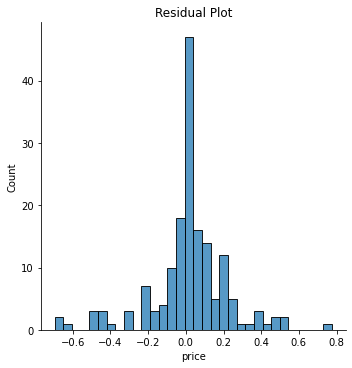

In [47]:
test_residuals = Y_test - test_preds
sns.displot(test_residuals)
plt.title("Residual Plot")
plt.show()

We can see that our prediction is **not bad**, but there are **some observations whose prediction is far than accurate** (e.g: observations which are near the above plot's tails).

## Save the Model

In [48]:
import pickle

filename = "model.sav"
pickle.dump(best_rf, open(filename, "wb"))

## Load the Saved Model

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7777523421672572
